# Análise dos Resultados - Detecção de Conteúdo Tóxico em Músicas

Este notebook contém a análise dos resultados do projeto de detecção de conteúdo tóxico em músicas. Vamos explorar:

1. Evolução temporal do conteúdo tóxico
2. Rankings e visualizações dos resultados
3. Insights sobre as classificações


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de estilo
sns.set_theme(style='whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = [12, 6] 

# Carregar os dados
df = pd.read_csv('../results/relacionamentos_toxicos_20250609_025111.csv')

# Renomear colunas para português
column_names = {
    'violence_or_betrayal': 'Violência Física',
    'emotional_abuse': 'Violência Psicológica',
    'jealousy_possessive': 'Ciúme e Possessividade',
    'dependency': 'Dependência Emocional'
}

# Lista de colunas para análise
toxic_columns = ['violence_or_betrayal', 'emotional_abuse', 'jealousy_possessive', 'dependency']
toxic_columns_pt = [column_names[col] for col in toxic_columns]

# Exibir informações do dataset
print("Informações do Dataset:")
print(f"Total de músicas: {len(df):,}")
print(f"Período analisado: {df['ano'].min():.0f} - {df['ano'].max():.0f}")
print(f"Número de artistas: {df['artista'].nunique():,}")

# Mostrar primeiras linhas
print("\nPrimeiras linhas do dataset:")
display(df.head())


Informações do Dataset:
Total de músicas: 4,633
Período analisado: 1959 - 2023
Número de artistas: 2,405

Primeiras linhas do dataset:


,indice,titulo,artista,ano,score,emotional_abuse,jealousy_possessive,dependency,violence_or_betrayal,justificativa
0,0,The Battle Of New Orleans,Johnny Horton,1959.0,0.0,False,False,False,False,NaN
1,2,Personality,Lloyd Price,1959.0,0.3,False,False,True,False,NaN
2,3,Venus,Frankie Avalon,1959.0,0.3,False,False,True,False,NaN
3,4,Lonely Boy,Paul Anka,1959.0,0.3,False,False,True,False,NaN
4,5,Dream Lover,Bobby Darin,1959.0,0.3,False,False,True,False,NaN


## Análise Temporal

Vamos analisar como o conteúdo tóxico nas músicas evoluiu ao longo dos anos. Para isso, vamos:
1. Calcular a média de conteúdo tóxico por ano
2. Criar visualizações da tendência temporal
3. Identificar períodos com maior concentração de conteúdo tóxico


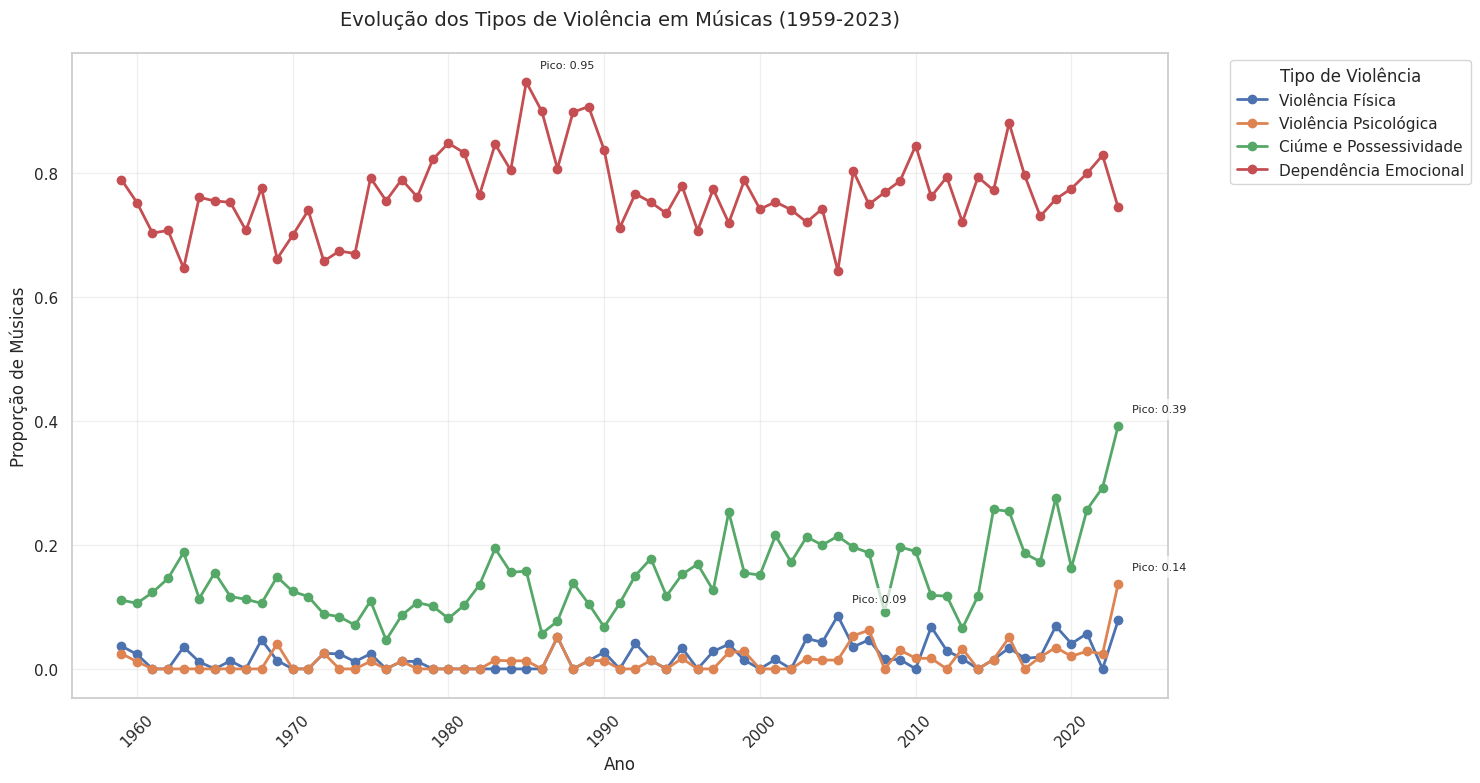


Evolução por Década:

Década de 1950:
Número de músicas: 81.0
Médias por tipo de violência:
- Violência Física: 3.7%
- Violência Psicológica: 2.5%
- Ciúme e Possessividade: 11.1%
- Dependência Emocional: 79.0%

Década de 1960:
Número de músicas: 843.0
Médias por tipo de violência:
- Violência Física: 1.4%
- Violência Psicológica: 0.5%
- Ciúme e Possessividade: 13.2%
- Dependência Emocional: 72.4%

Década de 1970:
Número de músicas: 816.0
Médias por tipo de violência:
- Violência Física: 1.1%
- Violência Psicológica: 0.5%
- Ciúme e Possessividade: 9.3%
- Dependência Emocional: 73.7%

Década de 1980:
Número de músicas: 773.0
Médias por tipo de violência:
- Violência Física: 0.6%
- Violência Psicológica: 1.0%
- Ciúme e Possessividade: 12.0%
- Dependência Emocional: 85.5%

Década de 1990:
Número de músicas: 695.0
Médias por tipo de violência:
- Violência Física: 2.0%
- Violência Psicológica: 1.0%
- Ciúme e Possessividade: 14.8%
- Dependência Emocional: 75.8%

Década de 2000:
Número de mús

In [24]:
# Análise temporal do conteúdo tóxico
yearly_means = df.groupby('ano')[toxic_columns].mean()

# Criando o gráfico de linhas
plt.figure(figsize=(15, 8))
for col, col_pt in zip(toxic_columns, toxic_columns_pt):
    plt.plot(yearly_means.index, yearly_means[col], marker='o', label=col_pt, linewidth=2)

plt.title('Evolução dos Tipos de Violência em Músicas (1959-2023)', fontsize=14, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Proporção de Músicas', fontsize=12)
plt.legend(title='Tipo de Violência', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Adicionar anotações para picos importantes
for col in toxic_columns:
    max_year = yearly_means[col].idxmax()
    max_value = yearly_means[col].max()
    plt.annotate(f'Pico: {max_value:.2f}',
                xy=(max_year, max_value),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

# Análise por década
df['decada'] = (df['ano'] // 10) * 10
decade_stats = df.groupby('decada')[toxic_columns].agg(['mean', 'count'])

print("\nEvolução por Década:")
for decade in sorted(df['decada'].unique()):
    stats = decade_stats.loc[decade]
    print(f"\nDécada de {decade:.0f}:")
    print(f"Número de músicas: {stats.loc[:, 'count'].iloc[0]:,}")
    print("Médias por tipo de violência:")
    for col, col_pt in zip(toxic_columns, toxic_columns_pt):
        mean = stats.loc[col, 'mean']
        print(f"- {col_pt}: {mean:.1%}")


## Rankings e Análise por Artista

Vamos analisar:
1. Top artistas com maior conteúdo tóxico em suas músicas
2. Distribuição de conteúdo tóxico por artista
3. Músicas mais tóxicas do dataset


/var/folders/xs/f2rzf2057gs7d9ngyzcvg0qm0000gn/T/ipykernel_58917/626409224.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = top_artists[('score_total', 'count')][i]


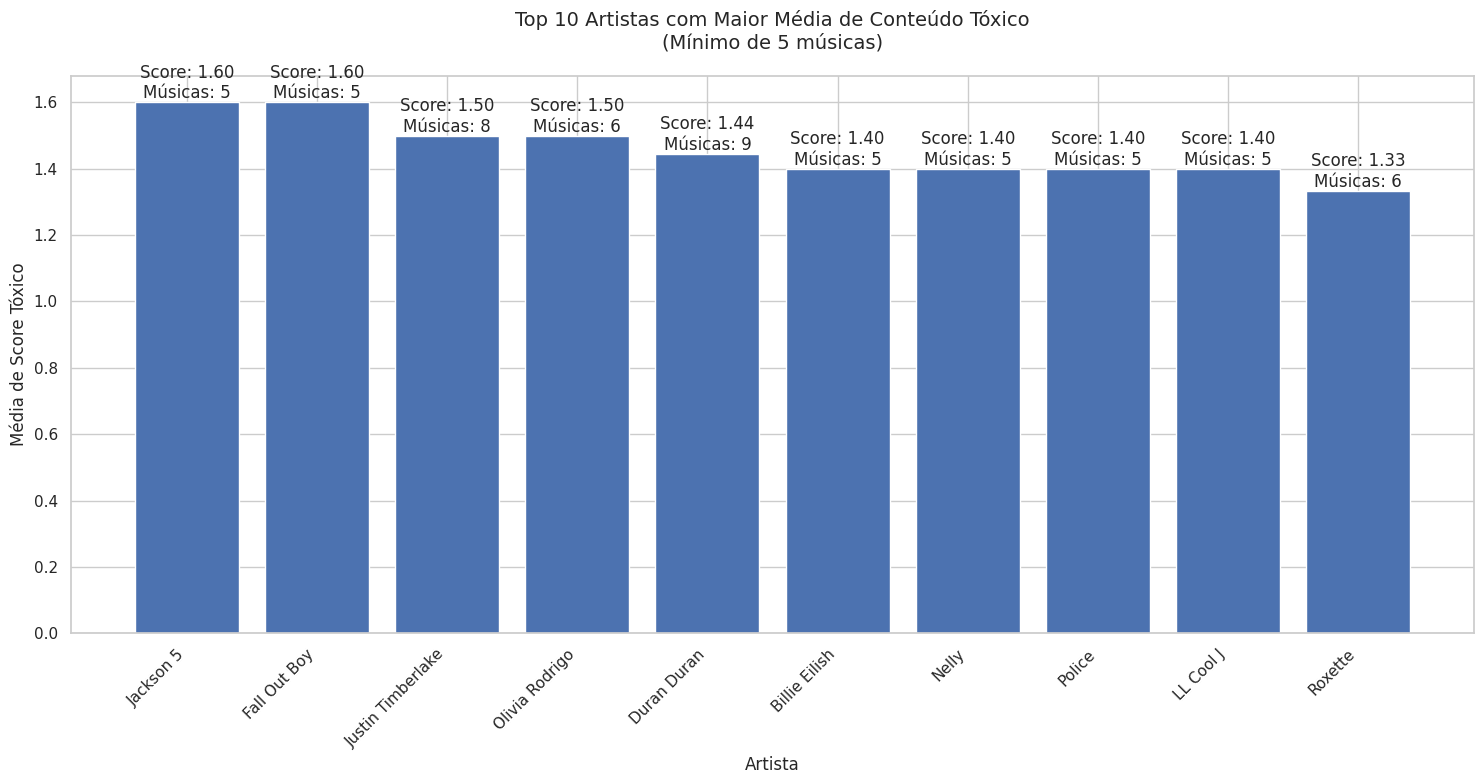


Top 10 Músicas Mais Tóxicas:


,Título,Artista,Ano,Score Total,Violência Física,Violência Psicológica,Ciúme e Possessividade,Dependência Emocional
4247,I Hate U I Love U,gnash feat. Olivia O'Brien,2016.0,4,True,True,True,True
49,Tell Him No,Travis and Bob,1959.0,3,True,True,True,False
66,Along Came Jones,Coasters,1959.0,3,True,True,False,True
92,Wild One,Bobby Rydell,1960.0,3,False,True,True,True
407,Judy's Turn To Cry,Lesley Gore,1963.0,3,True,False,True,True
824,Delilah,Tom Jones,1968.0,3,True,False,True,True
908,"Ruby, Don't Take Your Love To Town",Kenny Rogers and The First Edition,1969.0,3,True,True,False,True
1084,I Gotcha,Joe Tex,1972.0,3,False,True,True,True
1144,Troglodyte,Jimmy Castor Bunch,1972.0,3,True,True,False,True
1379,Only Women Bleed,Alice Cooper,1975.0,3,True,True,False,True


In [25]:
# Calculando score total de toxicidade para cada música
df['score_total'] = df[toxic_columns].sum(axis=1)

# Top 10 artistas com maior média de conteúdo tóxico
artist_stats = df.groupby('artista').agg({
    'score_total': ['mean', 'count']
}).sort_values(('score_total', 'mean'), ascending=False)

# Filtrando apenas artistas com pelo menos 5 músicas
min_songs = 5
top_artists = artist_stats[artist_stats[('score_total', 'count')] >= min_songs].head(10)

# Criando gráfico de barras para os top artistas
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(top_artists)), top_artists[('score_total', 'mean')])
plt.title('Top 10 Artistas com Maior Média de Conteúdo Tóxico\n(Mínimo de 5 músicas)', fontsize=14, pad=20)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Média de Score Tóxico', fontsize=12)
plt.xticks(range(len(top_artists)), top_artists.index, rotation=45, ha='right')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = top_artists[('score_total', 'count')][i]
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Score: {height:.2f}\nMúsicas: {count}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Top 10 músicas mais tóxicas
print("\nTop 10 Músicas Mais Tóxicas:")
top_songs = df.nlargest(10, 'score_total')[['titulo', 'artista', 'ano', 'score_total'] + toxic_columns]
top_songs.columns = ['Título', 'Artista', 'Ano', 'Score Total'] + toxic_columns_pt
display(top_songs)


## Conclusões e Insights

Vamos analisar algumas correlações e padrões interessantes encontrados nos dados:xq


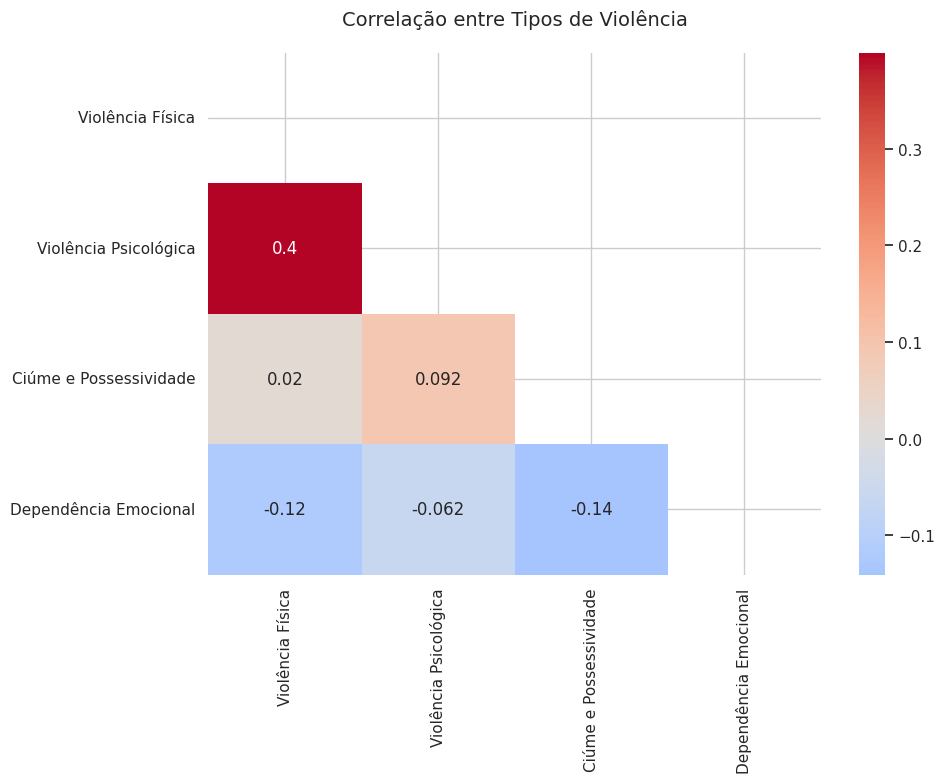


Estatísticas Gerais do Dataset:
Total de músicas analisadas: 4,633
Período analisado: 1959 - 2023
Número de artistas únicos: 2,405

Porcentagem de músicas com algum tipo de violência: 83.1%

Distribuição dos tipos de violência:
Violência Física: 1.9%
Violência Psicológica: 1.3%
Ciúme e Possessividade: 14.4%
Dependência Emocional: 76.8%

Análise do Score de Toxicidade:
Score médio: 0.343
Score mediano: 0.300
Score máximo: 1.000
Score mínimo: 0.000


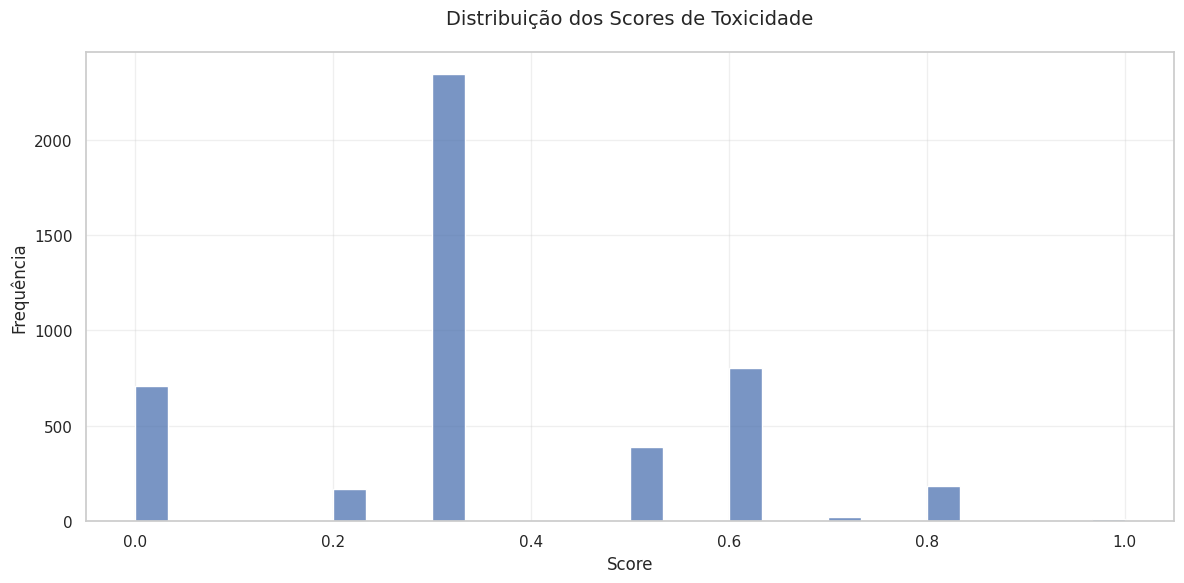

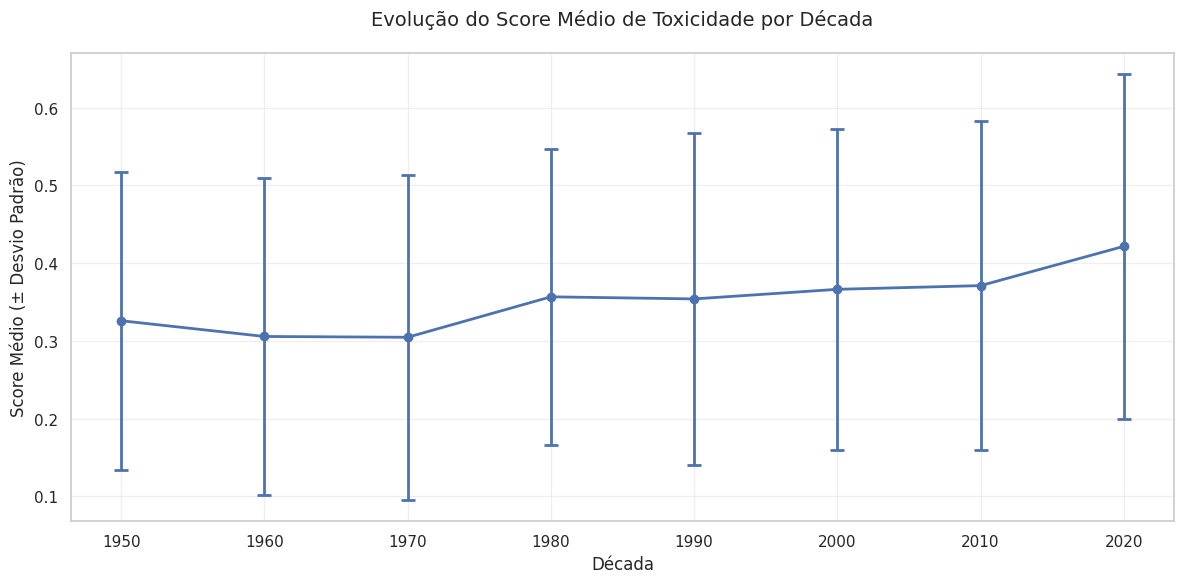

In [26]:
# Matriz de correlação entre os tipos de violência
plt.figure(figsize=(10, 8))
corr_matrix = df[toxic_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            xticklabels=toxic_columns_pt,
            yticklabels=toxic_columns_pt)
plt.title('Correlação entre Tipos de Violência', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Estatísticas gerais
print("\nEstatísticas Gerais do Dataset:")
print(f"Total de músicas analisadas: {len(df):,}")
print(f"Período analisado: {df['ano'].min():.0f} - {df['ano'].max():.0f}")
print(f"Número de artistas únicos: {df['artista'].nunique():,}")

# Porcentagem de músicas com algum tipo de violência
has_violence = df[toxic_columns].any(axis=1)
violence_percentage = (has_violence.sum() / len(df)) * 100

print(f"\nPorcentagem de músicas com algum tipo de violência: {violence_percentage:.1f}%")

# Distribuição dos tipos de violência
print("\nDistribuição dos tipos de violência:")
for col, col_pt in zip(toxic_columns, toxic_columns_pt):
    perc = (df[col].sum() / len(df)) * 100
    print(f"{col_pt}: {perc:.1f}%")

# Análise do score
print("\nAnálise do Score de Toxicidade:")
print(f"Score médio: {df['score'].mean():.3f}")
print(f"Score mediano: {df['score'].median():.3f}")
print(f"Score máximo: {df['score'].max():.3f}")
print(f"Score mínimo: {df['score'].min():.3f}")

# Distribuição dos scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='score', bins=30)
plt.title('Distribuição dos Scores de Toxicidade', fontsize=14, pad=20)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evolução do score médio por década
decade_scores = df.groupby('decada')['score'].agg(['mean', 'std', 'count'])
plt.figure(figsize=(12, 6))
plt.errorbar(decade_scores.index, 
            decade_scores['mean'], 
            yerr=decade_scores['std'],
            fmt='o-',
            capsize=5,
            capthick=2,
            linewidth=2)
plt.title('Evolução do Score Médio de Toxicidade por Década', fontsize=14, pad=20)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Score Médio (± Desvio Padrão)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Evolução da Toxicidade ao Longo do Tempo

Vamos analisar como a presença de conteúdo tóxico evoluiu nas músicas ao longo das décadas:



Evolução da Toxicidade Média por Década:

Década de 1950:


TypeError: unsupported format string passed to Series.__format__

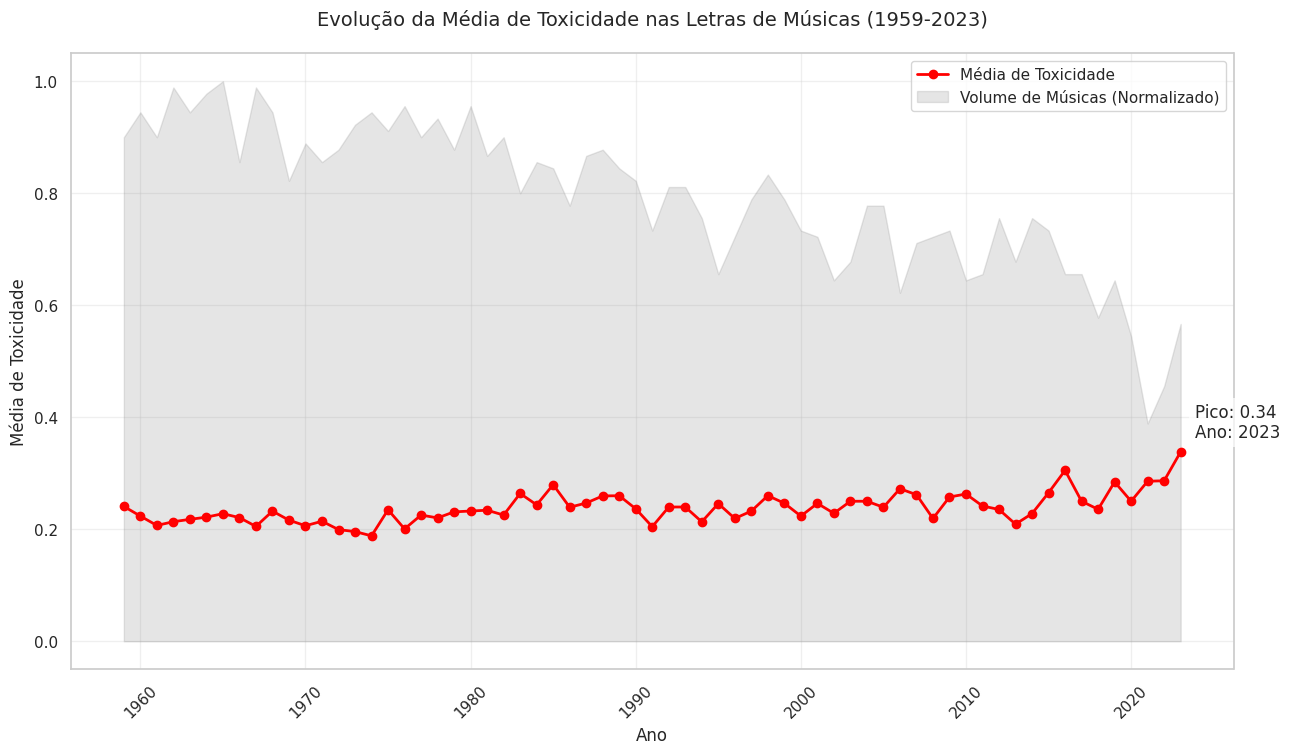

In [28]:
# Calculando a média de todos os tipos de violência por ano
df['toxicity_mean'] = df[toxic_columns].mean(axis=1)  # Média dos tipos de violência para cada música
yearly_toxic_means = df.groupby('ano').agg({
    'toxicity_mean': 'mean',
    'titulo': 'count'  # Para contar o número de músicas
}).rename(columns={'titulo': 'count'})

# Criando o gráfico
plt.figure(figsize=(15, 8))

# Linha principal de toxicidade média
plt.plot(yearly_toxic_means.index, yearly_toxic_means['toxicity_mean'], 
         marker='o', linewidth=2, color='red', 
         label='Média de Toxicidade')

# Área sombreada para o número de músicas
plt.fill_between(yearly_toxic_means.index, 
                 0, 
                 yearly_toxic_means['count'] / yearly_toxic_means['count'].max(),
                 alpha=0.2, color='gray',
                 label='Volume de Músicas (Normalizado)')

# Configurações do gráfico
plt.title('Evolução da Média de Toxicidade nas Letras de Músicas (1959-2023)', fontsize=14, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média de Toxicidade', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Adicionar anotações para picos importantes
max_year = yearly_toxic_means['toxicity_mean'].idxmax()
max_value = yearly_toxic_means['toxicity_mean'].max()
plt.annotate(f'Pico: {max_value:.2f}\nAno: {max_year:.0f}',
            xy=(max_year, max_value),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Legenda
plt.legend(loc='upper right')

# Estatísticas por década
print("\nEvolução da Toxicidade Média por Década:")
decade_toxic = df.groupby('decada').agg({
    'toxicity_mean': ['mean', 'std'],
    'titulo': 'count'
}).rename(columns={'titulo': 'count'})

for decade in sorted(df['decada'].unique()):
    stats = decade_toxic.loc[decade]
    print(f"\nDécada de {decade:.0f}:")
    print(f"Número de músicas: {stats['count']:,}")
    print(f"Média de toxicidade: {stats['toxicity_mean']['mean']:.3f} ± {stats['toxicity_mean']['std']:.3f}")

plt.tight_layout()
plt.show()
